<a href="https://colab.research.google.com/github/joshua-bj/ai-learn/blob/main/Cellphone_Usage_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
valakhorasani_mobile_device_usage_and_user_behavior_dataset_path = kagglehub.dataset_download('valakhorasani/mobile-device-usage-and-user-behavior-dataset')
print(valakhorasani_mobile_device_usage_and_user_behavior_dataset_path)
print('Data source import complete.')


100%|██████████| 11.3k/11.3k [00:00<00:00, 5.15MB/s]

Extracting files...
/root/.cache/kagglehub/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset/versions/1
Data source import complete.


## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Dataset Reading

In [4]:
dataset = pd.read_csv("/root/.cache/kagglehub/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset/versions/1/user_behavior_dataset.csv")
dataset.head(10)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
5,6,Google Pixel 5,Android,99,2.0,940,35,564,31,Male,2
6,7,Samsung Galaxy S21,Android,350,7.3,1802,66,1054,21,Female,4
7,8,OnePlus 9,Android,543,11.4,2956,82,1702,31,Male,5
8,9,Samsung Galaxy S21,Android,340,7.7,2138,75,1053,42,Female,4
9,10,iPhone 12,iOS,424,6.6,1957,75,1301,42,Male,4


In [5]:
dataset.shape

(700, 11)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [7]:
dataset.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


In [8]:
data_num = dataset.select_dtypes(include=["number"])
data_num.head()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
0,1,393,6.4,1872,67,1122,40,4
1,2,268,4.7,1331,42,944,47,3
2,3,154,4.0,761,32,322,42,2
3,4,239,4.8,1676,56,871,20,3
4,5,187,4.3,1367,58,988,31,3


In [9]:
corr_matrix = data_num.corr()
corr_matrix.head(10)

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
User ID,1.000000,-0.024957,-0.014287,-0.019377,-0.023914,-0.014527,0.045188,-0.016242
App Usage Time (min/day),-0.024957,1.000000,0.950333,0.956385,0.955253,0.942308,0.004382,0.970498
Screen On Time (hours/day),-0.014287,0.950333,1.000000,0.948983,0.946975,0.941322,0.017232,0.964581
Battery Drain (mAh/day),-0.019377,0.956385,0.948983,1.000000,0.961853,0.932276,-0.002722,0.978587
Number of Apps Installed,-0.023914,0.955253,0.946975,0.961853,1.000000,0.934800,0.004034,0.981255
Data Usage (MB/day),-0.014527,0.942308,0.941322,0.932276,0.934800,1.000000,0.003999,0.946734
Age,0.045188,0.004382,0.017232,-0.002722,0.004034,0.003999,1.000000,-0.000563
User Behavior Class,-0.016242,0.970498,0.964581,0.978587,0.981255,0.946734,-0.000563,1.000000


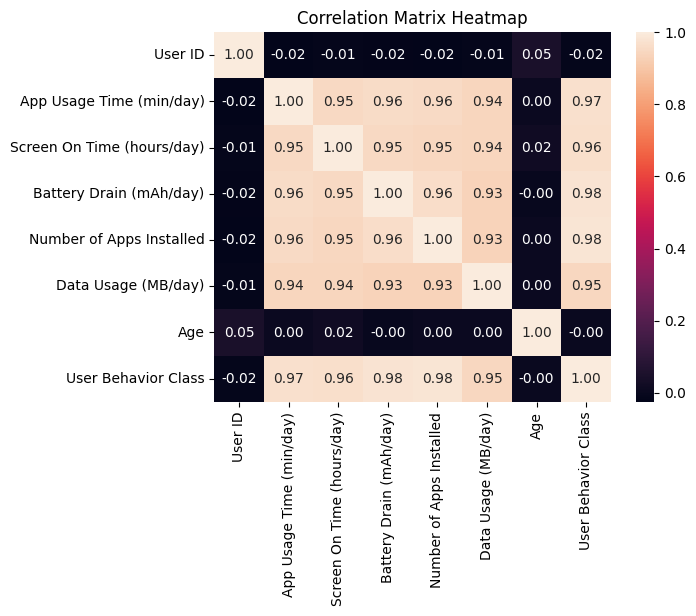

In [10]:
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

## Data Visualization

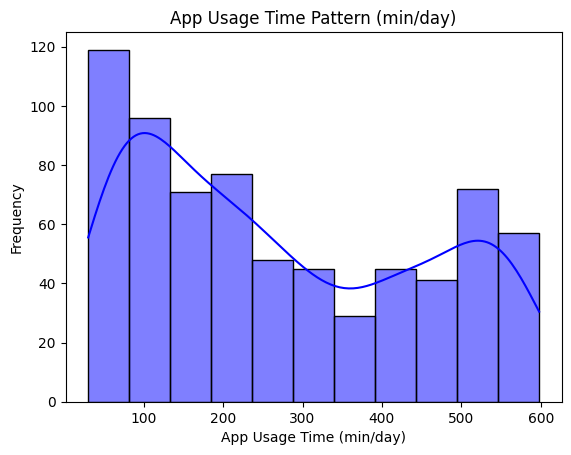

In [11]:
sns.histplot(dataset['App Usage Time (min/day)'], kde=True, color='blue')
plt.title('App Usage Time Pattern (min/day)')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Frequency')
plt.show()

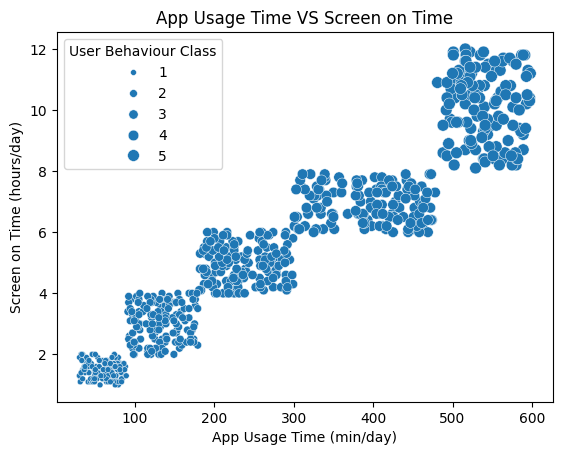

In [12]:
sns.scatterplot(x=dataset['App Usage Time (min/day)'], y=dataset['Screen On Time (hours/day)'], size=dataset['User Behavior Class'])
plt.title('App Usage Time VS Screen on Time')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Screen on Time (hours/day)')
plt.legend(title='User Behaviour Class')
plt.show()

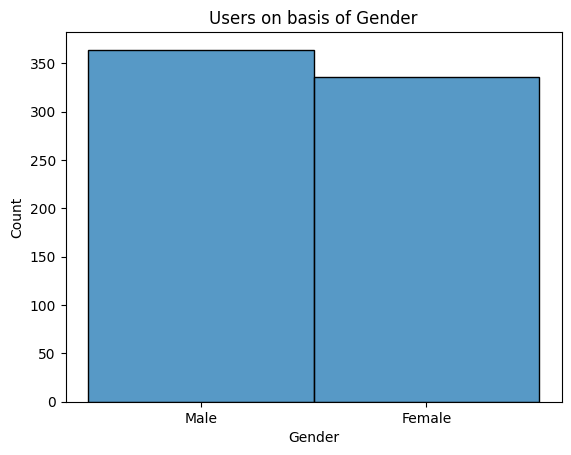

In [13]:
sns.histplot(x=dataset['Gender'])
plt.title('Users on basis of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

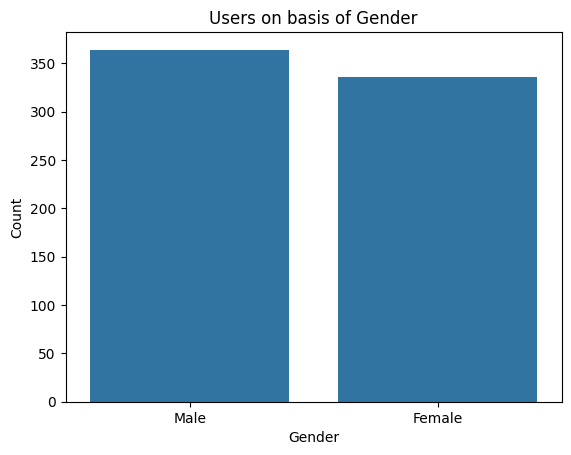

In [14]:
sns.countplot(x=dataset['Gender'])
plt.title('Users on basis of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## Encoding and Train Test Split

In [15]:
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()

dataset['Gender'] = encoder1.fit_transform(dataset['Gender'])
dataset['Operating System'] = encoder2.fit_transform(dataset['Operating System'])
dataset.head(10)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,0,393,6.4,1872,67,1122,40,1,4
1,2,OnePlus 9,0,268,4.7,1331,42,944,47,0,3
2,3,Xiaomi Mi 11,0,154,4.0,761,32,322,42,1,2
3,4,Google Pixel 5,0,239,4.8,1676,56,871,20,1,3
4,5,iPhone 12,1,187,4.3,1367,58,988,31,0,3
5,6,Google Pixel 5,0,99,2.0,940,35,564,31,1,2
6,7,Samsung Galaxy S21,0,350,7.3,1802,66,1054,21,0,4
7,8,OnePlus 9,0,543,11.4,2956,82,1702,31,1,5
8,9,Samsung Galaxy S21,0,340,7.7,2138,75,1053,42,0,4
9,10,iPhone 12,1,424,6.6,1957,75,1301,42,1,4


In [16]:
X = dataset.iloc[:,3:10]
y = dataset.iloc[:,-1]
X.head(10)

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,393,6.4,1872,67,1122,40,1
1,268,4.7,1331,42,944,47,0
2,154,4.0,761,32,322,42,1
3,239,4.8,1676,56,871,20,1
4,187,4.3,1367,58,988,31,0
5,99,2.0,940,35,564,31,1
6,350,7.3,1802,66,1054,21,0
7,543,11.4,2956,82,1702,31,1
8,340,7.7,2138,75,1053,42,0
9,424,6.6,1957,75,1301,42,1


In [17]:
y.head(10)

,User Behavior Class
0,4
1,3
2,2
3,3
4,3
5,2
6,4
7,5
8,4
9,4


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model

In [19]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
y_pred = model.predict(X_test)

## Model Accuracy, Confusion Matrix, Classification Report

In [21]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Accuracy: 1.0
Confusion Matrix: 
[[46  0  0  0  0]
 [ 0 34  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 47  0]
 [ 0  0  0  0 33]]
Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

